# Import data and package stuff



In [11]:
!pip install numpy pandas matplotlib seaborn optuna plotly scikit-learn imbalanced-learn catboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna, warnings, random
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

plt.style.use('dark_background')
warnings.simplefilter('ignore', category=FutureWarning)

In [12]:
ds = pd.read_csv('AIDS_Classification.csv')

ds

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,1091,3,21,53.2980,1,0,0,100,0,1,...,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,...,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,...,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,...,0,1,0,0,0,166,169,999,1838,1


# Data Insights

In [26]:
pd.DataFrame(ds.isna().sum()).T.style.background_gradient(cmap='rainbow')

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
ds.isna().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [28]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [29]:
ds.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


In [30]:
def to_categorical(df):
    cat_columns = [
        'trt',
        'hemo',
        'homo',
        'drugs',
        'oprior',
        'z30',
        'race',
        'gender',
        'str2',
        'strat',
        'symptom',
        'treat',
        'offtrt'
    ]
    for i in cat_columns:
        df[i] = pd.Categorical(df[i])
    return df

In [31]:
copy_ds=ds.copy()
to_categorical(copy_ds).dtypes

time           int64
trt         category
age            int64
wtkg         float64
hemo        category
homo        category
drugs       category
karnof         int64
oprior      category
z30         category
preanti        int64
race        category
gender      category
str2        category
strat       category
symptom     category
treat       category
offtrt      category
cd40           int64
cd420          int64
cd80           int64
cd820          int64
infected       int64
dtype: object

In [39]:
def mPlotter(r, c, size, _targets, text):

    bg = '#010108'

    palette = ['#df5337', '#d24644', '#f7d340', '#3339FF', '#440a68', '#84206b', '#f1ef75', '#fbbe23', '#400a67']

    font = 'calibri'

    fig = plt.figure(figsize=size)

    fig.patch.set_facecolor(bg)

    grid = fig.add_gridspec(r, c)

    grid.update(wspace=0.5, hspace=0.25)

    __empty_diff = ((r * c) - 1) - len(_targets)

    axes = []

    for i in range(r):
        for j in range(c):
            axes.append(fig.add_subplot(grid[i, j]))

    for idx, ax in enumerate(axes):
        ax.set_facecolor(bg)

        if idx == 0:
            ax.spines["bottom"].set_visible(False)
            ax.tick_params(left=False, bottom=False)
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.text(0.5, 0.5,
                 f'{text}',
                 horizontalalignment='center',
                 verticalalignment='center',
                 fontsize=18,
                 fontweight='bold',
                 fontfamily=font,
                 color="#fff")
        else:
            if (idx - 1) < len(_targets):
                ax.set_title(_targets[idx - 1].capitalize(), fontsize=14, fontweight='bold', fontfamily=font, color="#fff")
                ax.grid(color='#fff', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
                ax.set_xlabel("")
                ax.set_ylabel("")
            else:
                ax.spines["bottom"].set_visible(False)
                ax.tick_params(left=False, bottom=False)
                ax.set_xticklabels([])
                ax.set_yticklabels([])

        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

    def cb(ax):
        ax.set_xlabel("")
        ax.set_ylabel("")

    if __empty_diff > 0:
        axes = axes[:-1*__empty_diff]

    return axes, palette, cb

In [33]:
target = 'infected'
cont_cols = ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']
dis_cols = list(set(ds.columns) - set([*cont_cols, target]))

len(cont_cols), len(dis_cols)

(8, 14)

# Data Visualization



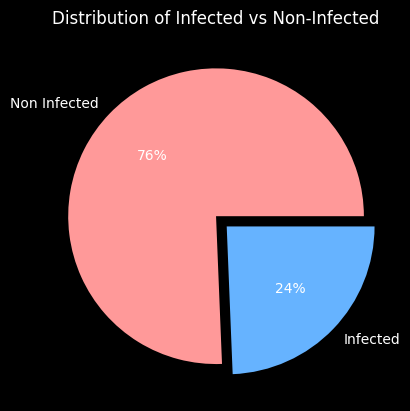

In [23]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.pie(
    ds['infected'].value_counts(),
    labels=['Non Infected', 'Infected'],
    explode=[0, 0.1],
    autopct='%.0f%%',
    colors=['#ff9999', '#66b3ff']
)

plt.title('Distribution of Infected vs Non-Infected', color='white')

plt.show()


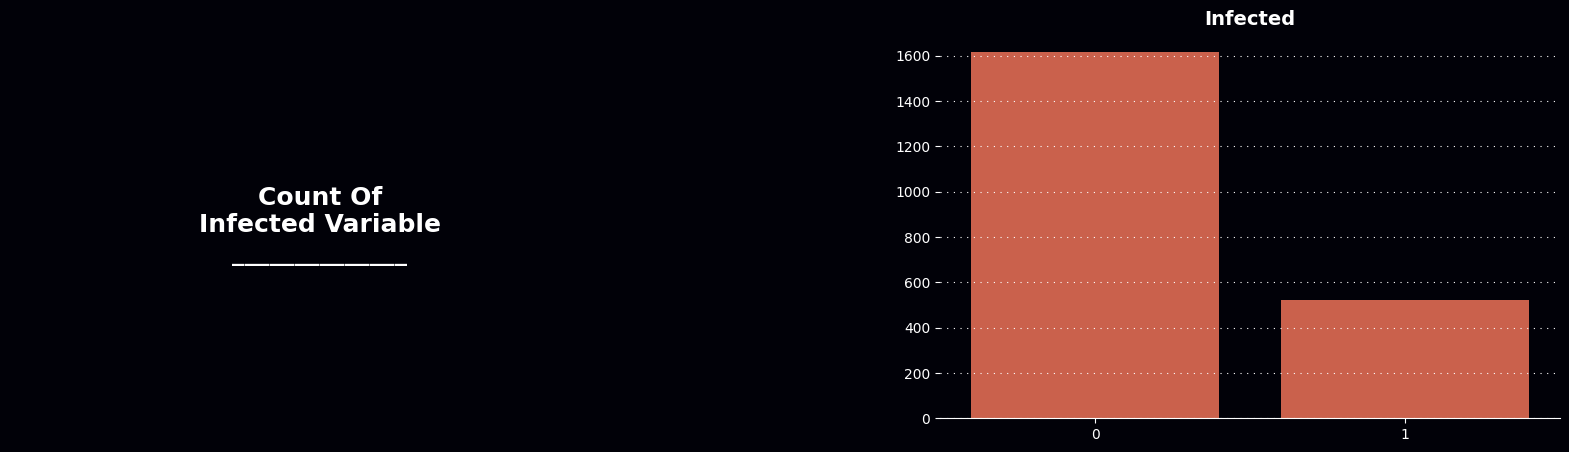

In [37]:
axes, palette, cb = mPlotter(1, 2, (20, 5), [target], 'Count Of\nInfected Variable\n______________')

sns.countplot(x=ds[target], ax = axes[1], color=palette[0])
cb(axes[1])

In [43]:
infected_count = ds[target].value_counts()

print(infected_count)


infected
0    1618
1     521
Name: count, dtype: int64


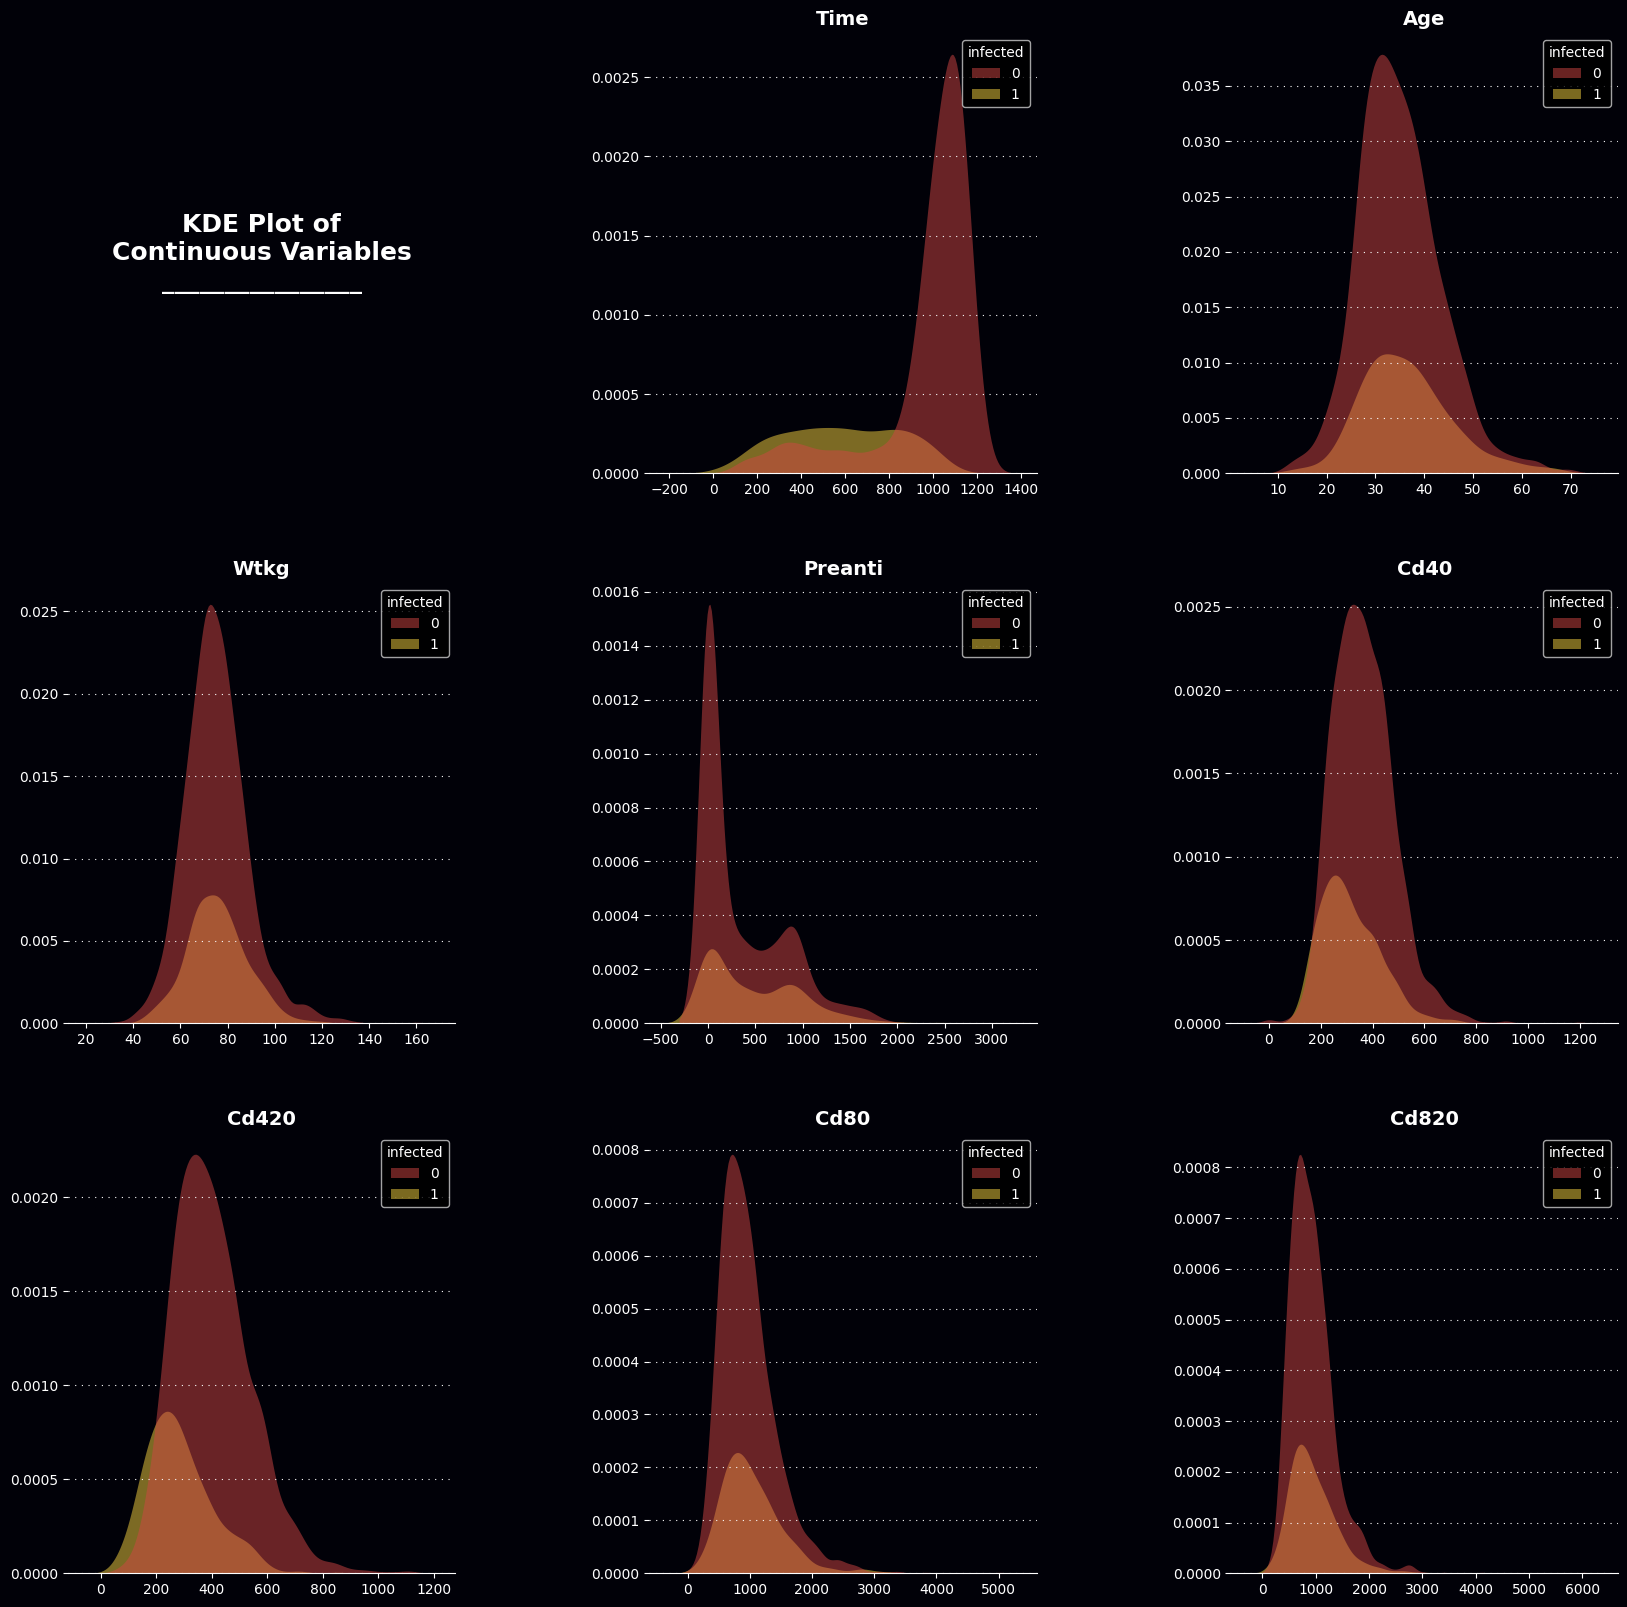

In [ ]:
axes, palette, cb = mPlotter(3, 3, (20, 20), cont_cols, 'KDE Plot of\nContinuous Variables\n________________')

for col, ax in zip(cont_cols, axes[1:]):
    sns.kdeplot(data=ds, x=col, ax=ax, hue=target, palette=palette[1:3], alpha=.5, linewidth=0, fill=True)
    cb(ax)

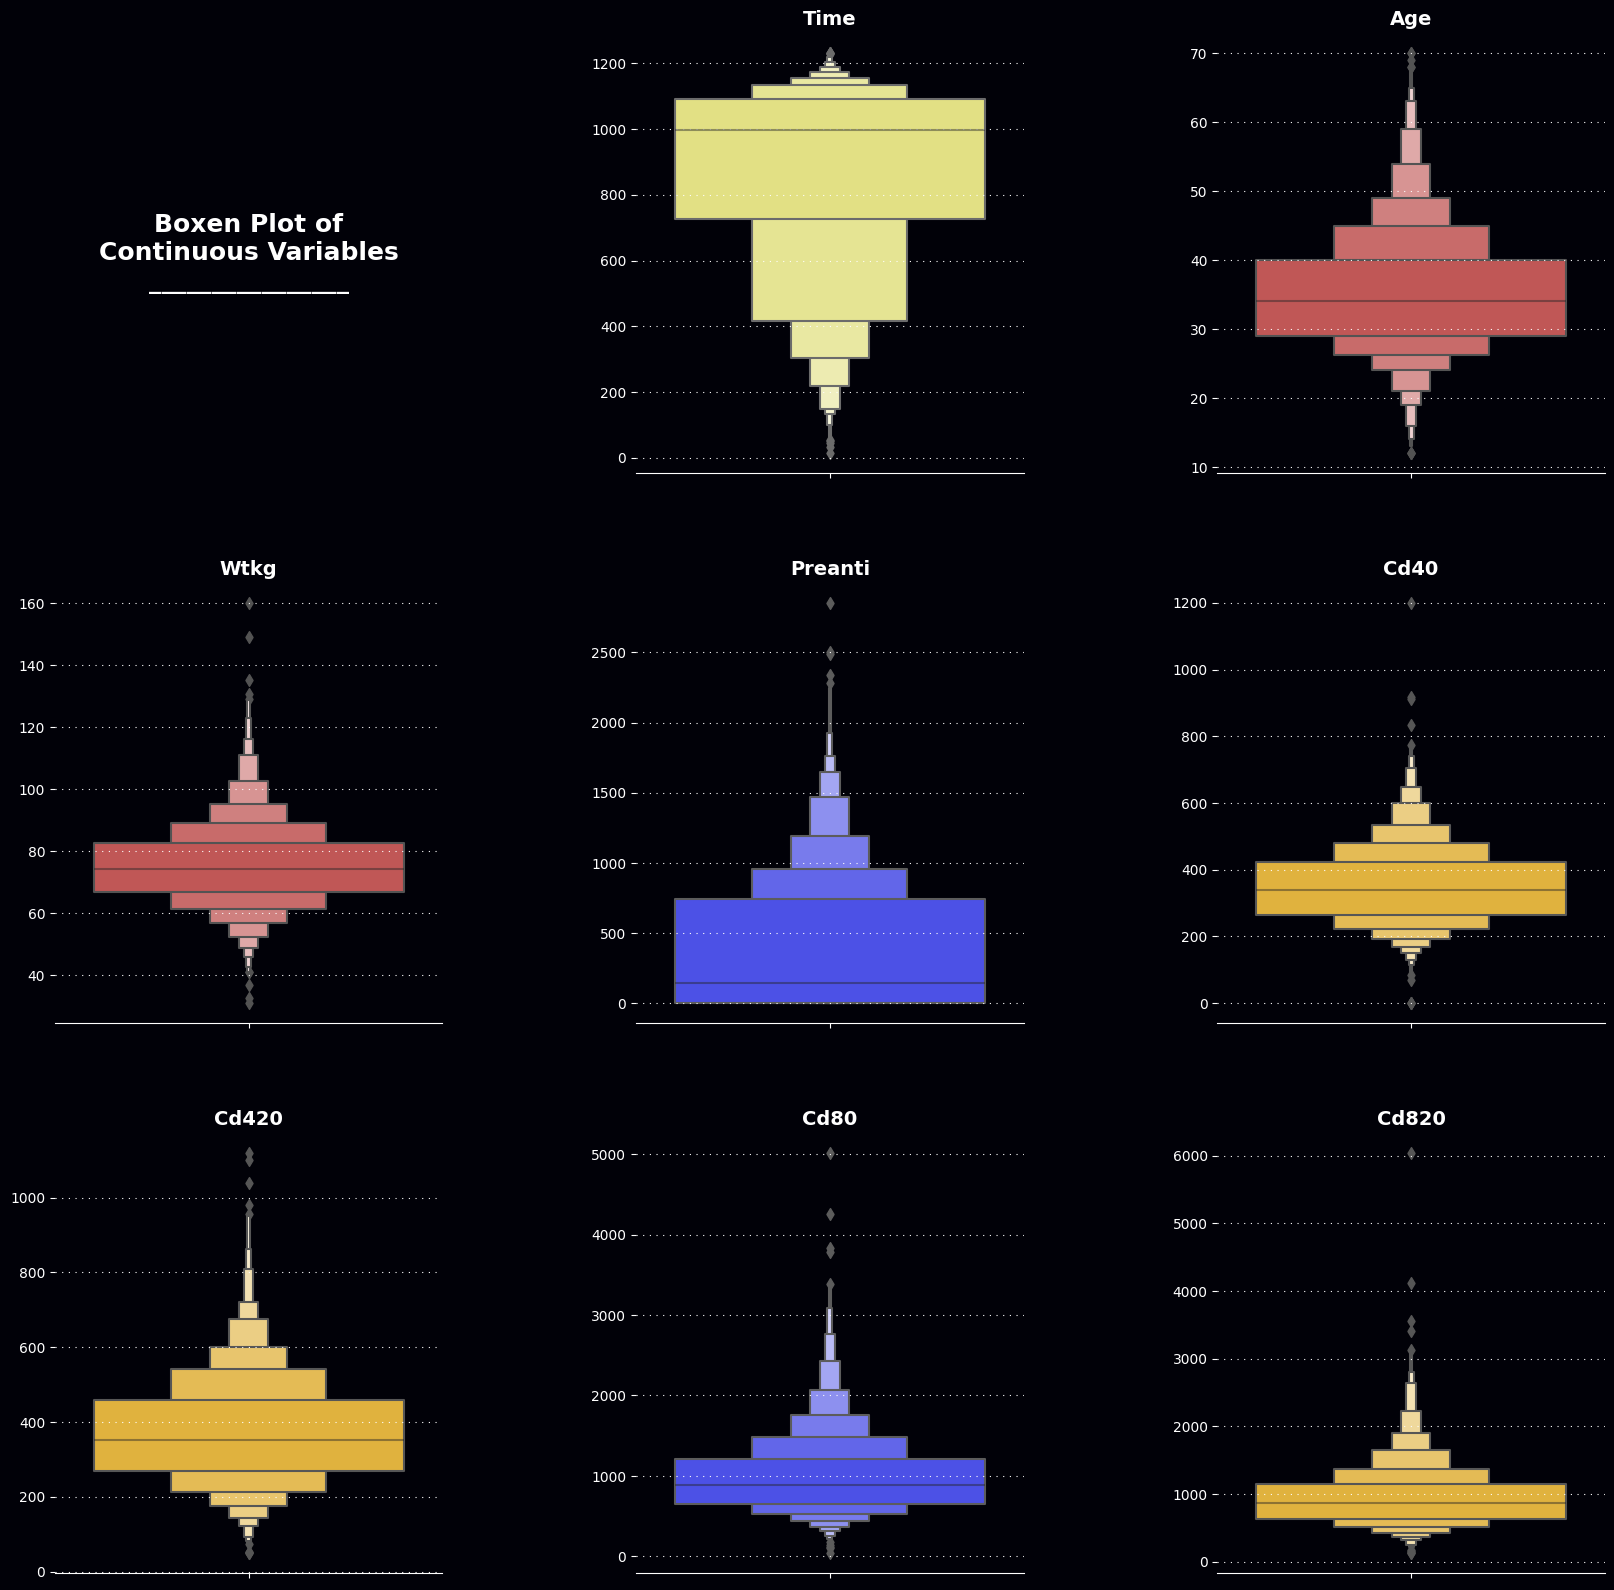

In [ ]:
axes, palette, cb = mPlotter(3, 3, (20, 20), cont_cols, 'Boxen Plot of\nContinuous Variables\n________________')

for col, ax in zip(cont_cols, axes[1:]):
    sns.boxenplot(data=ds, y=col, ax=ax, palette=[palette[random.randint(0, len(palette)-1)]])
    cb(ax)

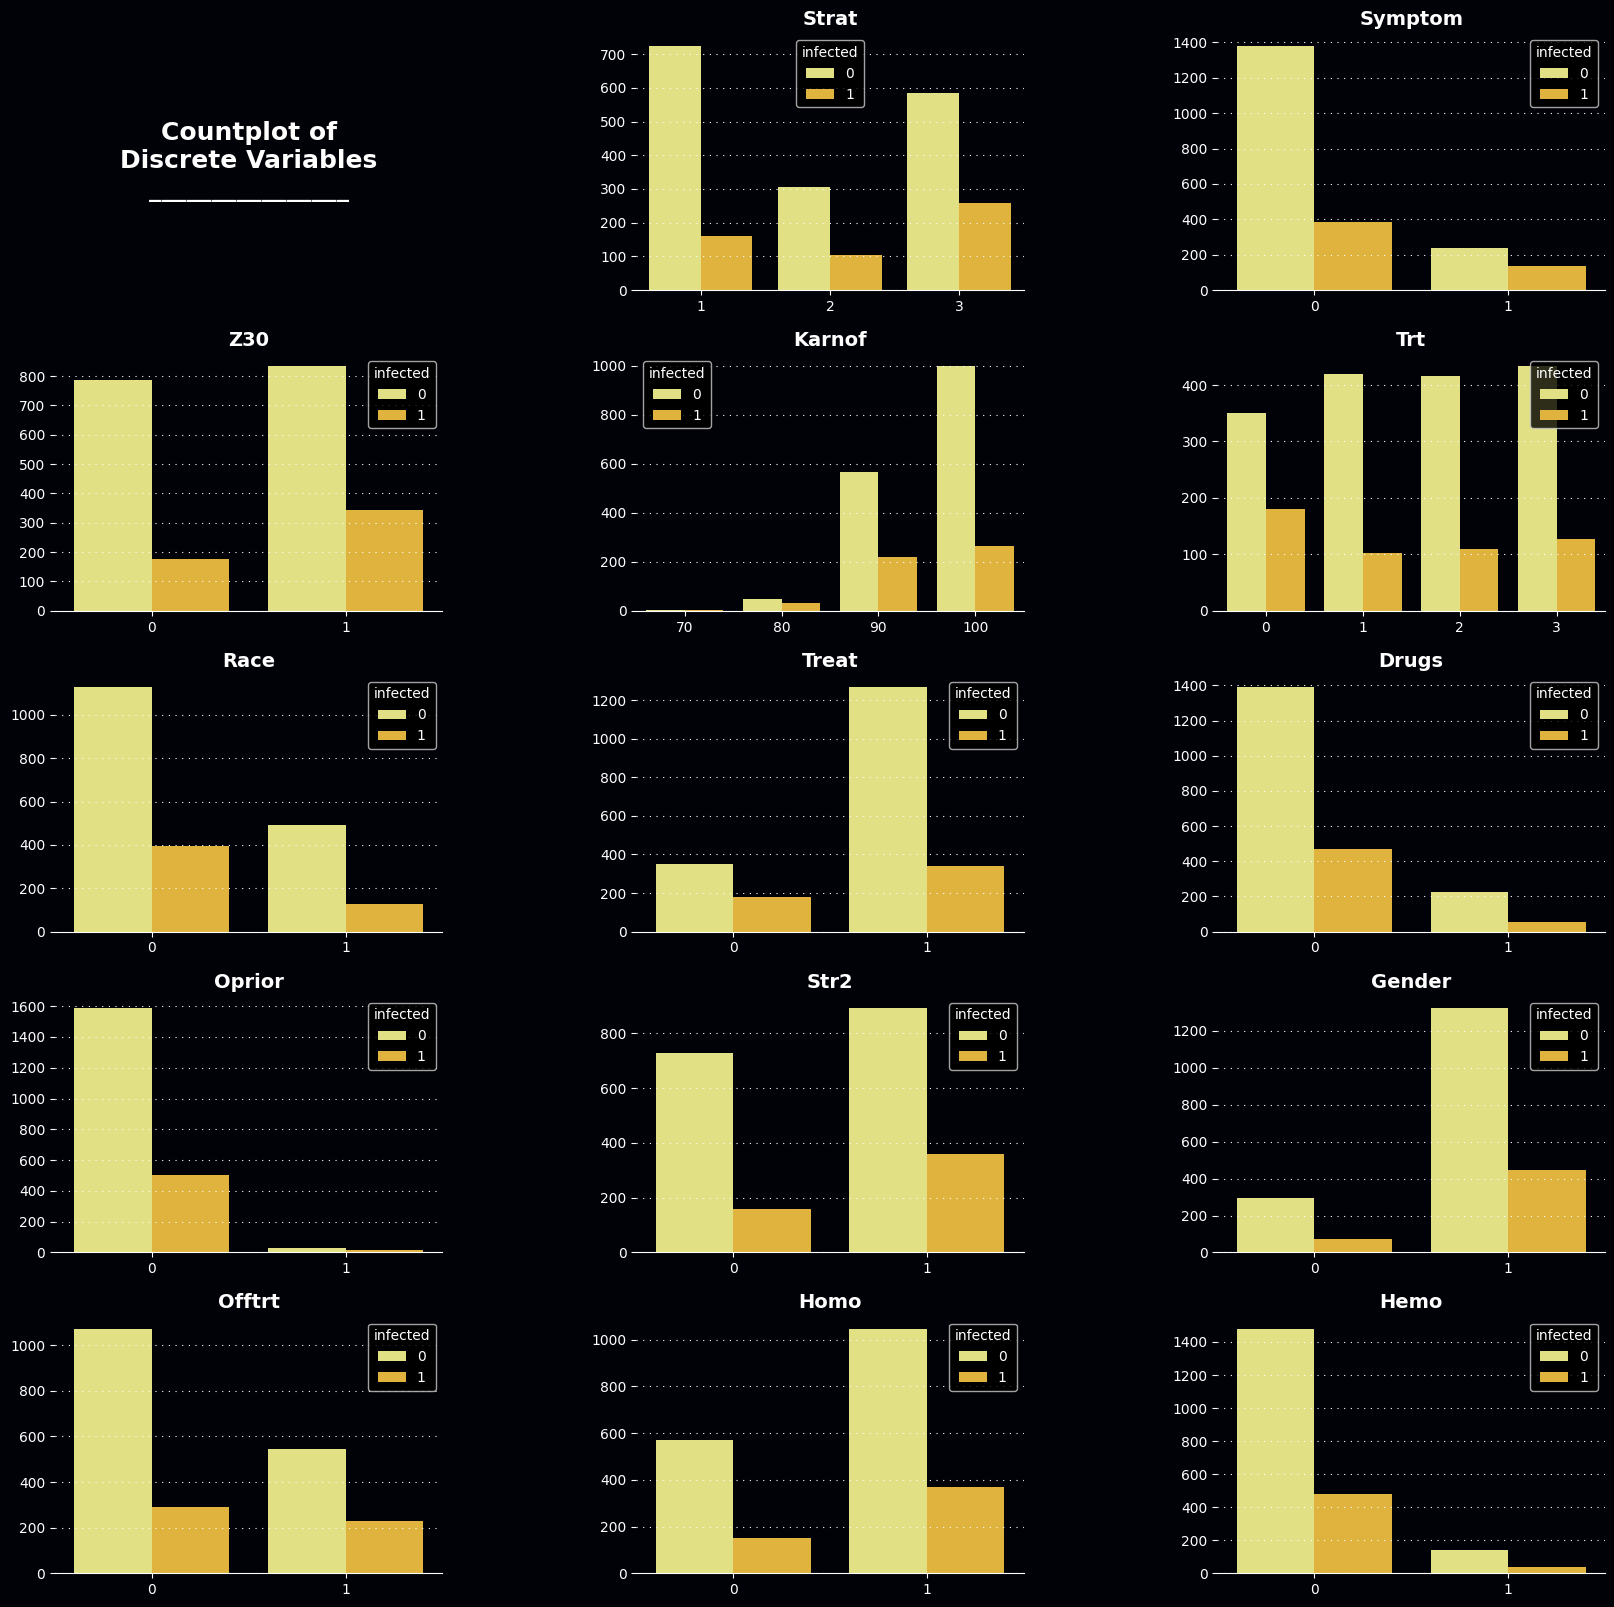

In [ ]:
axes, palette, cb = mPlotter(5, 3, (20, 20), dis_cols, 'Countplot of\nDiscrete Variables\n________________')

for col, ax in zip(dis_cols, axes[1:]):
    sns.countplot(x=ds[col], ax = ax, hue=ds[target], palette=palette[6:8])
    cb(ax)

In [44]:
ax = px.scatter_3d(ds, x="age", y="wtkg", z="time", template= "plotly_dark", color="infected")

ax.show()

In [45]:
ax = px.scatter_3d(ds, x="preanti", y="cd40", z="cd420", template= "plotly_dark", color="infected")

ax.show()

In [46]:
ax = px.scatter_3d(ds, x="preanti", y="cd80", z="cd820", template= "plotly_dark", color="infected")

ax.show()

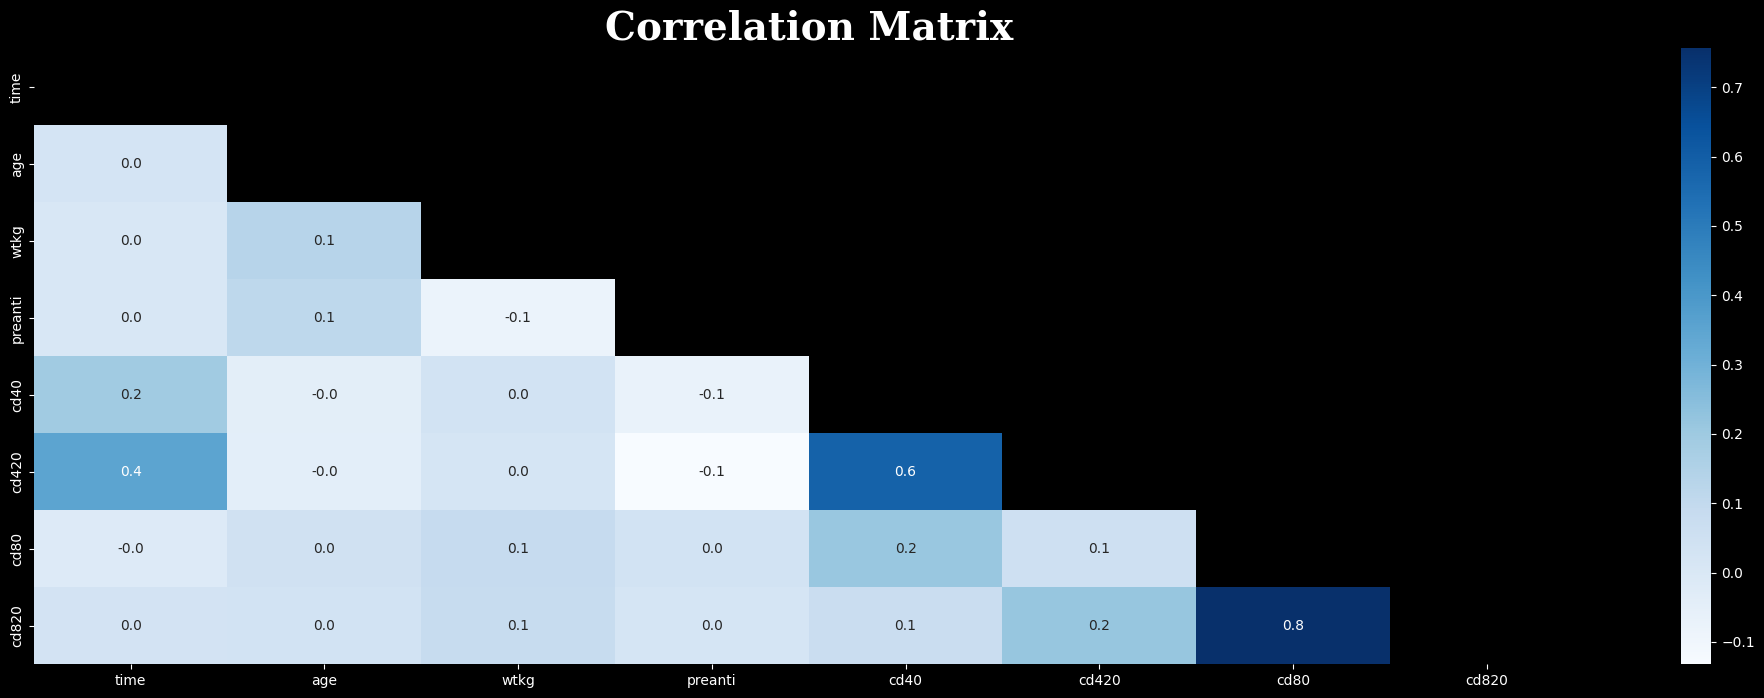

In [ ]:
fig = plt.figure(figsize=(25, 8))

gs = fig.add_gridspec(1, 1)

gs.update(wspace=0.3, hspace=0.15)

ax = fig.add_subplot(gs[0, 0])

ax.set_title("Correlation Matrix", fontsize=28, fontweight='bold', fontfamily='serif', color="#fff")

sns.heatmap(ds[cont_cols].corr().transpose(), mask=np.triu(np.ones_like(ds[cont_cols].corr().transpose())), fmt=".1f", annot=True, cmap='Blues')

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ds.iloc[:,:-1], ds.iloc[:, -1], random_state=3, train_size=.7)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1497, 22), (1497,), (642, 22), (642,))

# Balance the data

In [ ]:
smote = SMOTE(random_state = 14)

x_train, y_train = smote.fit_resample(x_train, y_train)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2246, 22), (2246,), (642, 22), (642,))

# Scale the data to ground

In [ ]:
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)



# Find best hyperparameter for catboost!



In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'depth': trial.suggest_int('depth', 1, 12),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'thread_count': -1,
        'loss_function': 'MultiClass',
        'eval_metric': 'Accuracy',
        'verbose': False
    }

    model = CatBoostClassifier(**params)

    model.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=False, early_stopping_rounds=20)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=50, show_progress_bar=True)

[I 2024-04-27 11:30:39,199] A new study created in memory with name: no-name-af863032-91ea-4f84-9027-5479c0d63081


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-04-27 11:30:39,449] Trial 0 finished with value: 0.8255451713395638 and parameters: {'iterations': 348, 'learning_rate': 0.030008091743732226, 'depth': 1, 'l2_leaf_reg': 7.7473872829875585, 'border_count': 143}. Best is trial 0 with value: 0.8255451713395638.
[I 2024-04-27 11:30:39,622] Trial 1 finished with value: 0.897196261682243 and parameters: {'iterations': 333, 'learning_rate': 0.24264283893273056, 'depth': 7, 'l2_leaf_reg': 0.002032805566871, 'border_count': 13}. Best is trial 1 with value: 0.897196261682243.
[I 2024-04-27 11:30:39,714] Trial 2 finished with value: 0.897196261682243 and parameters: {'iterations': 500, 'learning_rate': 0.3489980445292005, 'depth': 4, 'l2_leaf_reg': 0.008437815117505361, 'border_count': 1}. Best is trial 1 with value: 0.897196261682243.
[I 2024-04-27 11:30:44,736] Trial 3 finished with value: 0.8987538940809969 and parameters: {'iterations': 449, 'learning_rate': 0.27066952951461315, 'depth': 12, 'l2_leaf_reg': 0.10341568969360866, 'borde

In [ ]:
model = CatBoostClassifier(
    verbose=0,
    random_state=3,
    **study.best_params
)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Oversee the model performance

In [ ]:
print (classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       499
           1       0.76      0.78      0.77       143

    accuracy                           0.89       642
   macro avg       0.85      0.85      0.85       642
weighted avg       0.90      0.89      0.89       642



<Axes: >

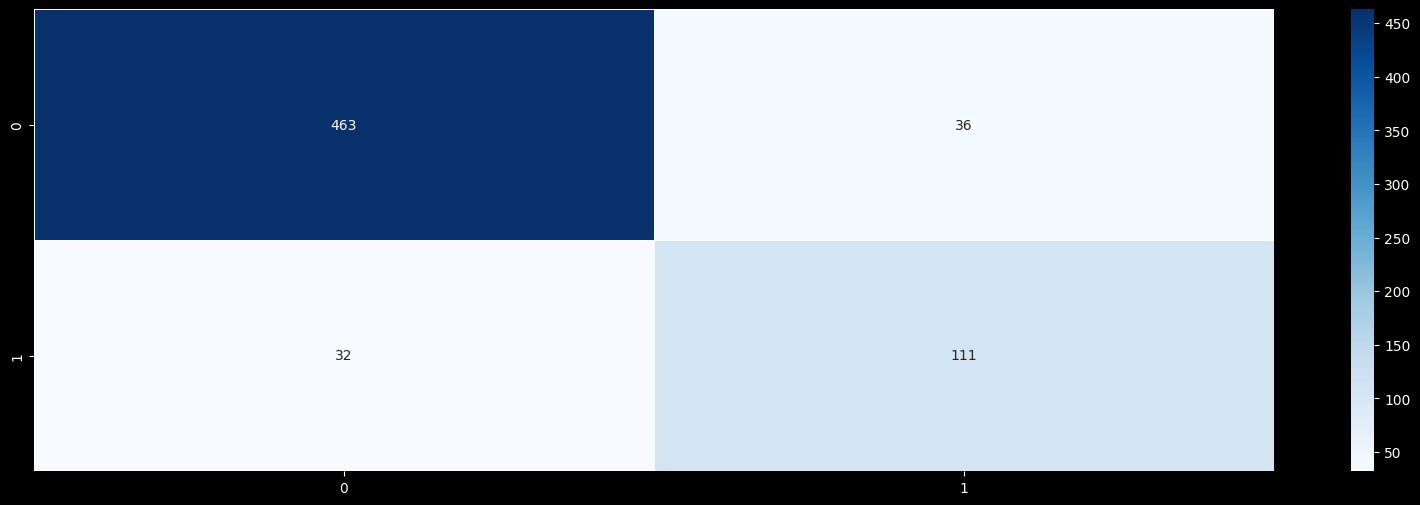

In [ ]:
plt.subplots(figsize=(20, 6))

sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, fmt="d", cmap="Blues", linewidths=.5)

# MODEL PREDICTION USING KNN CLASSIFIER

Train Accuracy: 0.7784921098772648
Test Accuracy: 0.7079439252336449


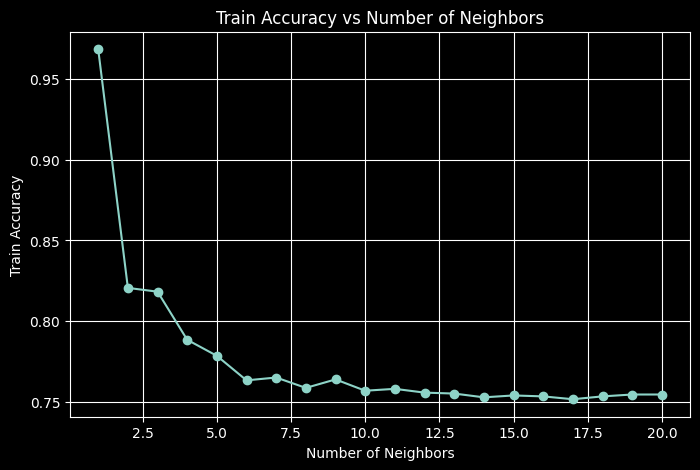

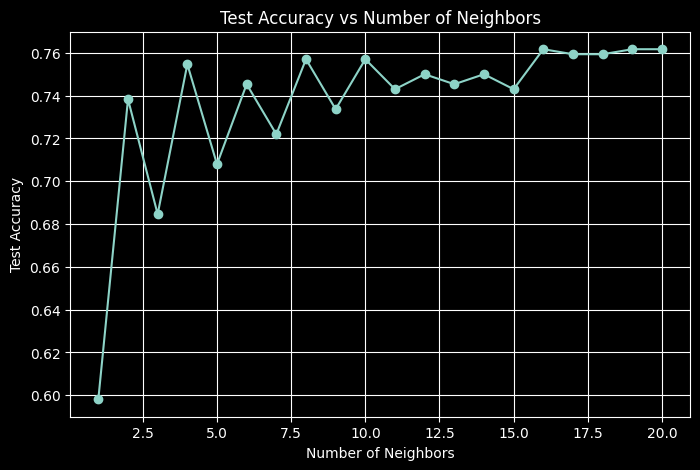

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

ds = pd.read_csv('AIDS_Classification.csv')

X = ds[['age', 'wtkg']]
y = ds['infected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_train = knn_model.predict(X_train_scaled)
y_pred_test = knn_model.predict(X_test_scaled)

train_accuracy = np.mean(y_pred_train == y_train)
test_accuracy = np.mean(y_pred_test == y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)



neighbors_range = range(1, 21)

train_accuracies = []
test_accuracies = []

for n_neighbors in neighbors_range:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train_scaled, y_train)

    y_pred_train = knn_model.predict(X_train_scaled)
    y_pred_test = knn_model.predict(X_test_scaled)

    train_accuracy = np.mean(y_pred_train == y_train)
    test_accuracy = np.mean(y_pred_test == y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(8, 5))
plt.plot(neighbors_range, train_accuracies, marker='o', linestyle='-')
plt.title('Train Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Train Accuracy')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(neighbors_range, test_accuracies, marker='o', linestyle='-')
plt.title('Test Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


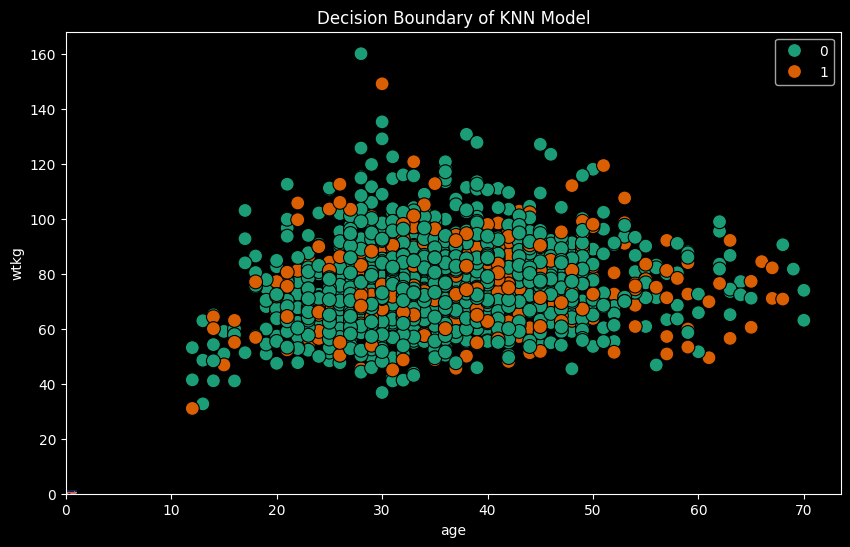

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

feature1 = 'age'
feature2 = 'wtkg'

X_visualization = ds[[feature1, feature2]]
y_visualization = ds['infected']

X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_visualization, y_visualization, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_vis_train_scaled = scaler.fit_transform(X_vis_train)
X_vis_test_scaled = scaler.transform(X_vis_test)

knn_visualization = KNeighborsClassifier(n_neighbors=5)
knn_visualization.fit(X_vis_train_scaled, y_vis_train)

plt.figure(figsize=(10, 6))

sns.scatterplot(x=feature1, y=feature2, hue='infected', data=ds, palette='Dark2', edgecolor='k', s=100)

xx, yy = np.meshgrid(np.linspace(X_vis_train_scaled[:, 0].min(), X_vis_train_scaled[:, 0].max(), 100),
                     np.linspace(X_vis_train_scaled[:, 1].min(), X_vis_train_scaled[:, 1].max(), 100))
Z = knn_visualization.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary of KNN Model')
plt.legend(loc='upper right')
plt.show()
